# STE Binary Networks

In [1]:
# import torch base code
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from os import path
sys.path.append(path.join("..", "src"))
import torch_base
import matplotlib.pyplot as plt
import subprocess as sub

**Helper Functions**

In [9]:
"""
Function : run_cmd
    
    runs a python script from within python and prints stdout to screen in real-time
    
    Args:
        cmd (string) : command to run as subprocess
        
    Ref: https://stackoverflow.com/questions/17411966/
"""

def run_cmd(cmd):
    
    # create subprocess
    proc = sub.Popen(cmd, stdout=sub.PIPE, universal_newlines=True)
    
    # read output line for line
    while proc.poll() is None:
        
        opt = proc.stdout.readline()
        print(opt)
    
    # print rest of output
    print(proc.stdout.read()) 
    
    return


"""
Function: mfccshow
    
    displays a tensor mfcc
    
        Args:
            mfcc (torch.Tensor) : image tensor (T, Freq)
            title (string)      : plot title
"""


def mfccshow(mfcc, title=''):

    # place image on CPU
    mfcc = mfcc.cpu()

    # plot MFCC
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(mfcc.transpose(0, 1))
    
    print("Mfcc Size (T, Freq) : {}".format(mfcc.size()))

    return

## Data Processing

Mfcc Size (T, Freq) : torch.Size([100, 13])


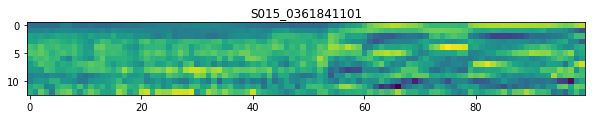

In [33]:
# imports
import torchvision.transforms as tf
from torch.utils.data import DataLoader
from torch_base.process_data import MfccDataset, Numpy2Tensor, CropMfcc, mfcc_collate

train_dl = DataLoader(
    
    dataset=MfccDataset(
        '~/Music/ZeroSpeech2019/english/train_unsegmented_1.dd.npz',
        transform=tf.Compose([
            Numpy2Tensor(),
            CropMfcc(t=100, freq=13)
        ]),
        ret_keys=True
    ),
    
    batch_size=1,
    shuffle=False
)

keys, mfcc = iter(train_dl).next()

# display MFCC
mfccshow(mfcc[0], title=keys[0])

## MFCC Autoencoder (No Speaker Conditioning)

**Train**

In [ ]:
# run Training Script
cmd = " ".join([
    "python ~/Projects/suzerospeech2019/src/torch_base/train.py",
    "--sys",           "MfccAuto",
    "--epochs",           "50",
    "--gamma",            "0.1",
    "--learn_rate",       "0.001",
    "--log",              "~/Music/MfccAuto/logs",
    "--train",            '~/Music/ZeroSpeech2019/english/train.dd.npz',
    "--valid",            '~/Music/ZeroSpeech2019/english/test.dd.npz',
    "--save",             "~/Music/MfccAuto/saved_models",
    "--batch_size",       "100",
    "--bottleneck_depth", "7",
    "--mfcc_width",       "100",
    "--mfcc_height",      "13",
    "--checkpoint",
    "--verbose"   
])

run_cmd(cmd)

Mfcc Size (T, Freq) : torch.Size([100, 13])


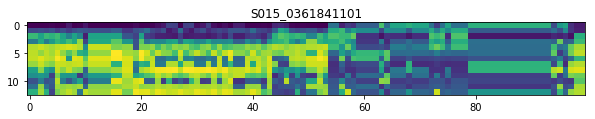

In [35]:
# imports
import torchvision.transforms as tf
from torch.utils.data import DataLoader
from torch_base.process_data import MfccDataset, Numpy2Tensor, CropMfcc, mfcc_collate

train_dl = DataLoader(
    
    dataset=MfccDataset(
        '~/Music/MfccAuto/english/train/output_feats.npz',
        transform=tf.Compose([
            Numpy2Tensor(),
            CropMfcc(t=100, freq=13)
        ]),
        ret_keys=True
    ),
    
    batch_size=1,
    shuffle=False
)

keys, mfcc = iter(train_dl).next()

# display MFCC
mfccshow(mfcc[0], title=keys[0])